# Supervised learning

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [10]:
cols = ["fLength","fWidth","fsize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df

fLength    fWidth   fsize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [11]:
# we are converting 'g' and 'h' of classes as 1 and 0 respectively for better performance
df["class"]=(df["class"]=="g").astype(int)

In [12]:
df

fLength    fWidth   fsize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

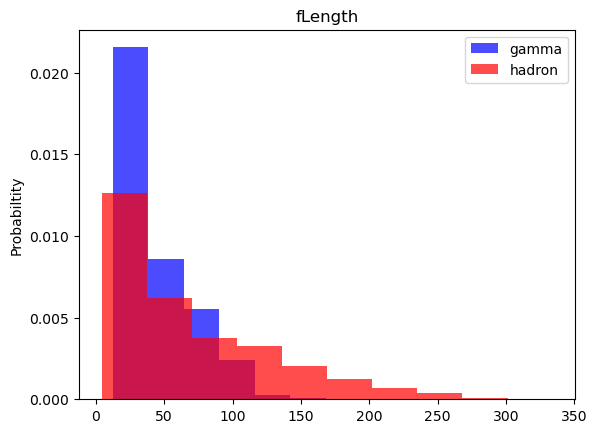

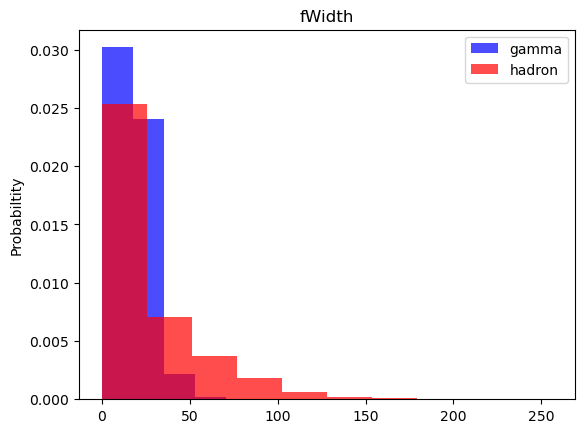

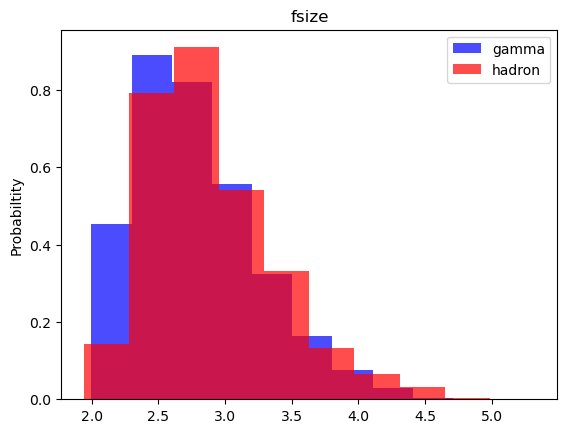

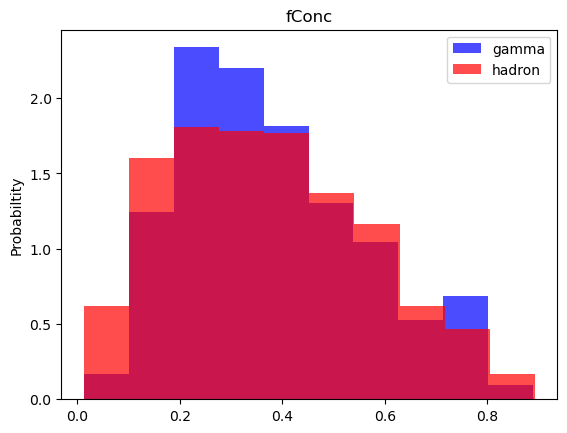

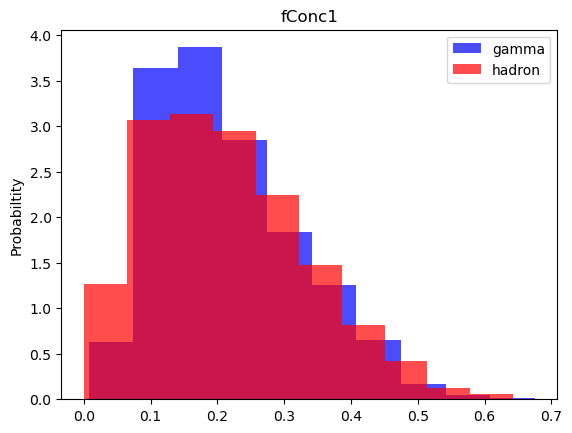

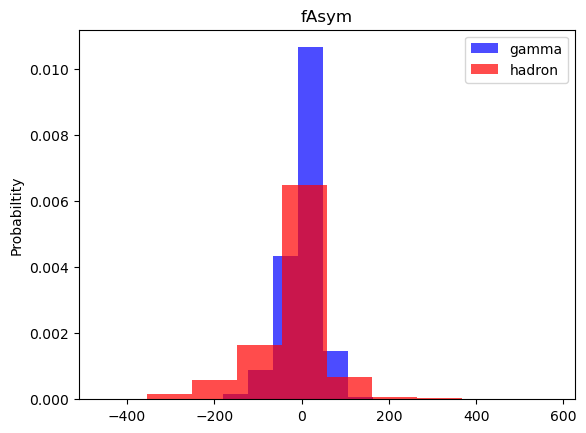

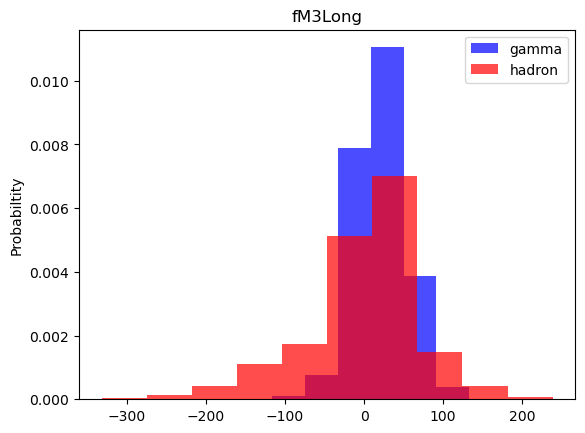

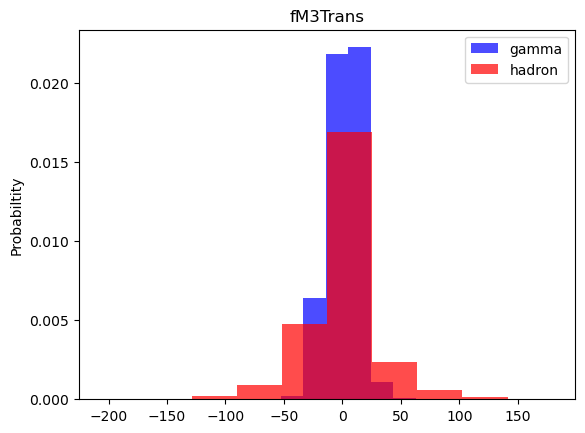

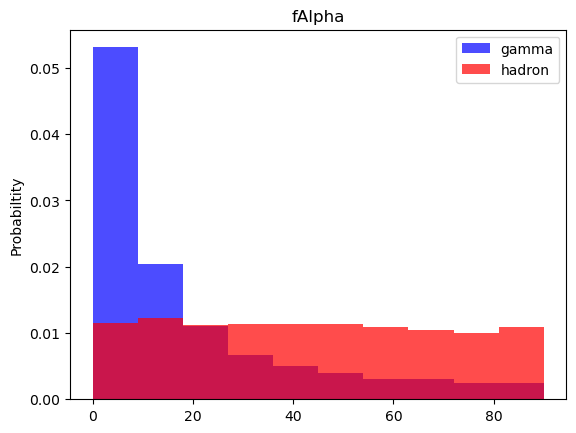

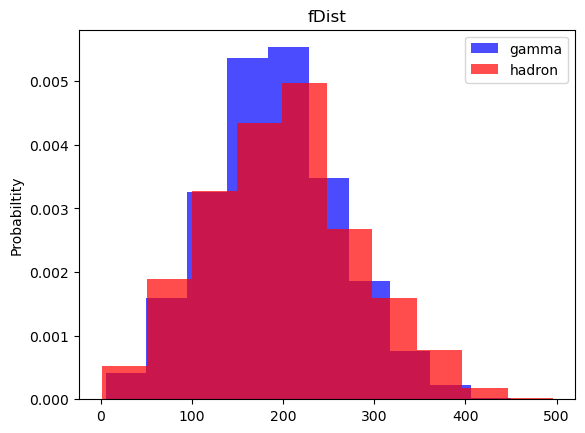

In [13]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color ='blue', label='gamma',alpha=0.7,density = True)
    plt.hist(df[df['class']==0][label], color ='red', label='hadron',alpha=0.7,density = True)
    plt.title(label)
    plt.ylabel("Probabiltity")
    plt.legend()
    plt.show()

# Train, Validation test datasets

In [14]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])
#sample function will shuffle the data 

In [15]:
def scale_dataset(dataframe,oversample= False):
    X=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values    
    
    #Scaling the values of a column to the mean value
    scaler =StandardScaler()
    X=scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)
        # RandomOverSampler: used to sample training data such that number of occurance of 1 and o
        # (i.e gama and hadronic) will become equal
        
    data = np.hstack((X,np.reshape(y,(-1,1))))
    # hstack: horizontal concatination of 2 arrays
    # -1 here means the len(y)
    return data, X, y

In [16]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7434
3978


In [17]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(test, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)



In [18]:
len(y_train)

14868

In [19]:
sum(y_train == 1)

7434

In [20]:
sum(y_train ==0)

7434

# KNN algorithm

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# predictions
y_pred = knn_model.predict(X_test)

In [24]:
y_pred
# predicted y values

array([0, 1, 0, ..., 0, 1, 1])

In [25]:
y_test
# actual y values

array([1, 1, 0, ..., 0, 1, 0])

In [26]:
print(classification_report(y_test,y_pred))
#precision: measure of quality
#recall: measure of quantity
#f1-score: combination of precision and recall

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1338
           1       0.86      0.86      0.86      2466

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes Algorithm

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [29]:
y_pred = nb_model.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))
# we can see from the output that precision recall and f1 score decreases as that of KNN

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1338
           1       0.73      0.90      0.81      2466

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lg_model = LogisticRegression()
lg_model = nb_model.fit(X_train, y_train)

In [33]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))
# perform better than naive 

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1338
           1       0.73      0.90      0.81      2466

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



# Support Vector Machine (SVM) Algorithm


In [34]:
from sklearn.svm import SVC
#SVC: Support Vector Classifier

In [35]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [36]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))
# results better than knn, logistic and naive bayes

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1338
           1       0.89      0.91      0.90      2466

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Networks 

In [37]:
#!pip install tensorflow
# to install tensorflow in conda environment we use command:  conda install -c conda-forge tensorflow

In [38]:
import tensorflow as tf

In [55]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'],label='accurarcy')
    ax2.plot(history.history['val_accuracy'],label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    
    plt.show()
# epoch: training cycle

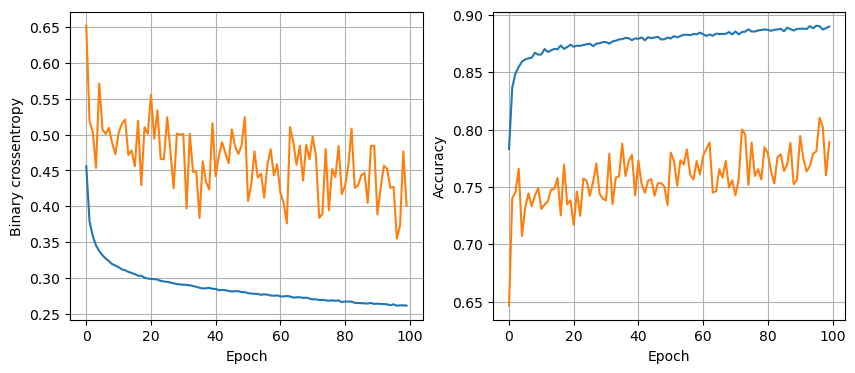

In [56]:
plot_history(history)

In [57]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation ='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history= nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2, verbose =0

    )
    
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


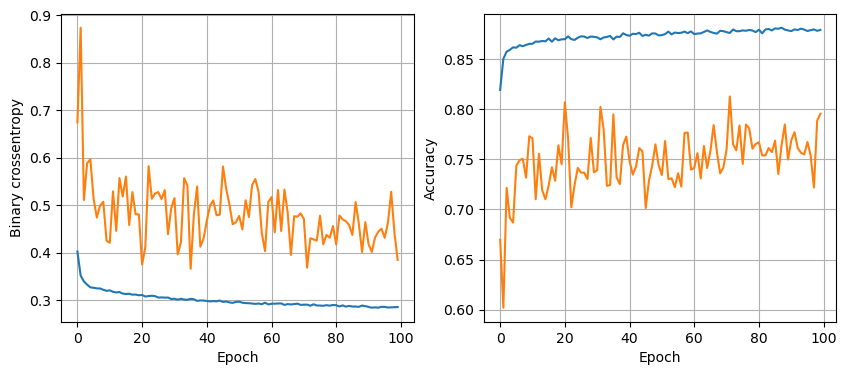

119/119 [==============================] - 0s 912us/step - loss: 0.3209 - accuracy: 0.8764
16 nodes, dropout 0, lr 0.01, batch size 64


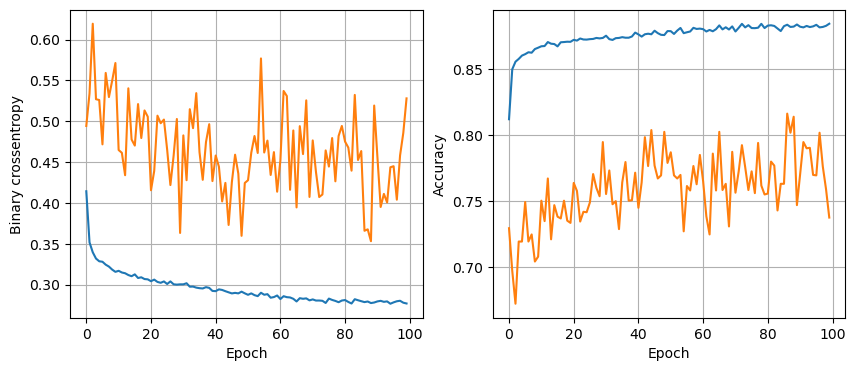

119/119 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8772
16 nodes, dropout 0, lr 0.01, batch size 128


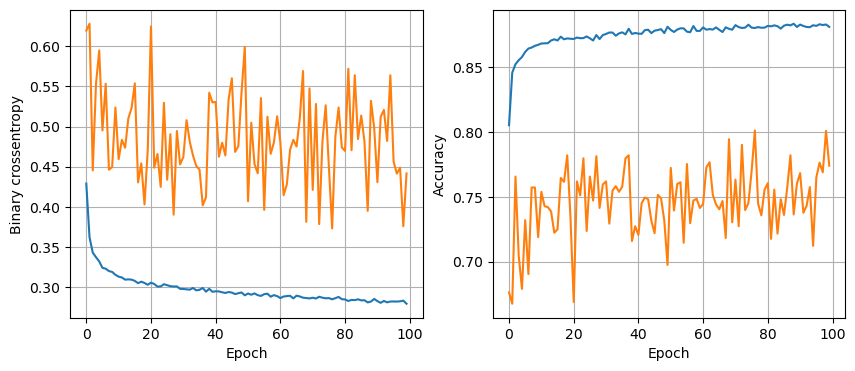

119/119 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8746
16 nodes, dropout 0, lr 0.005, batch size 32


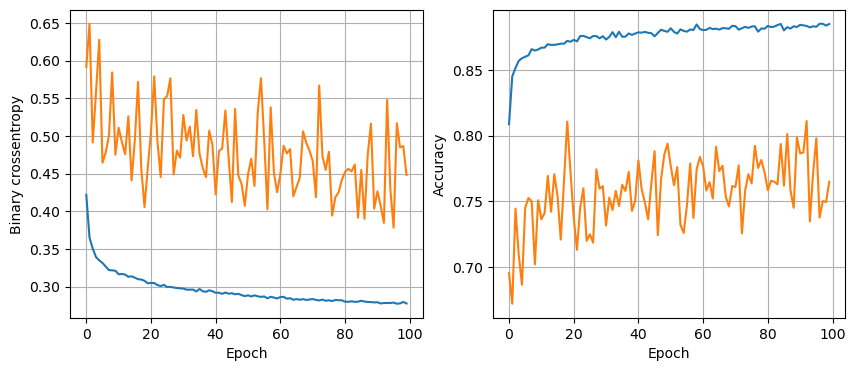

119/119 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8738
16 nodes, dropout 0, lr 0.005, batch size 64


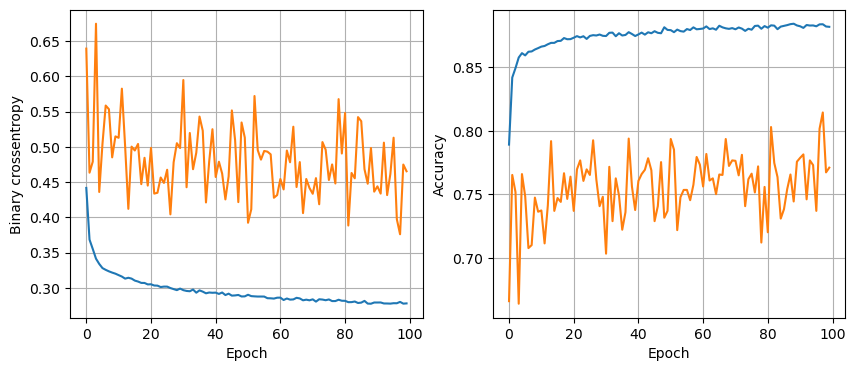

119/119 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8746
16 nodes, dropout 0, lr 0.005, batch size 128


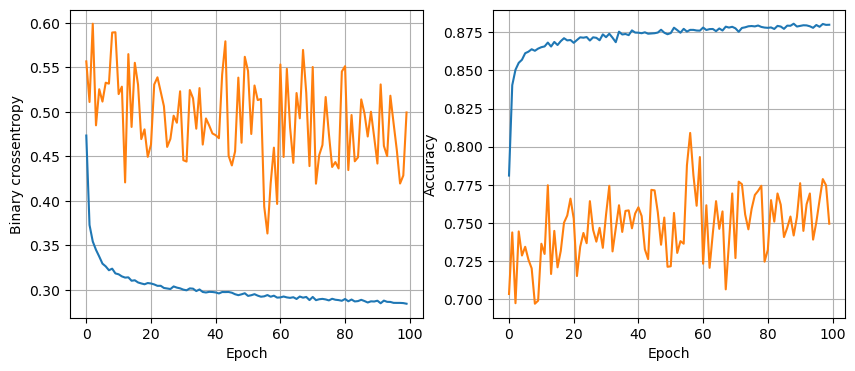

119/119 [==============================] - 0s 945us/step - loss: 0.3058 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.001, batch size 32


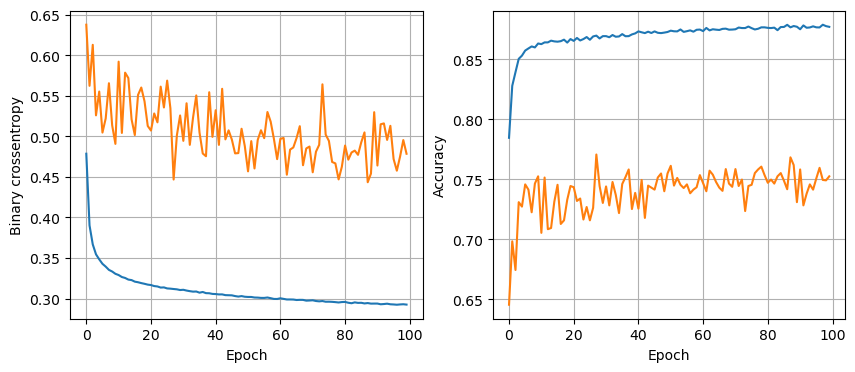

119/119 [==============================] - 0s 1ms/step - loss: 0.3041 - accuracy: 0.8764
16 nodes, dropout 0, lr 0.001, batch size 64


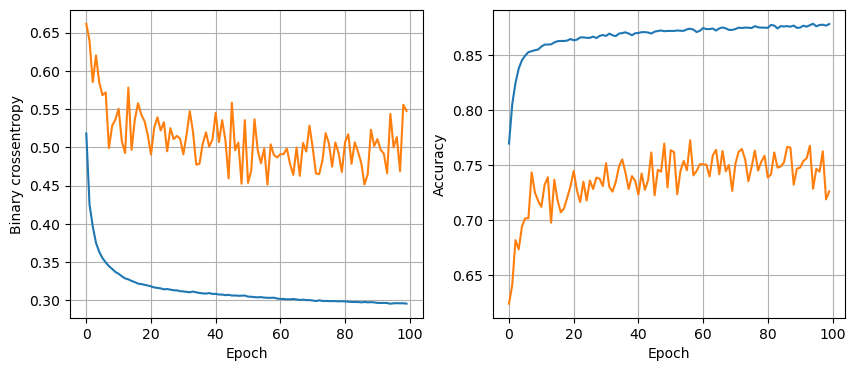

119/119 [==============================] - 0s 936us/step - loss: 0.3113 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.001, batch size 128


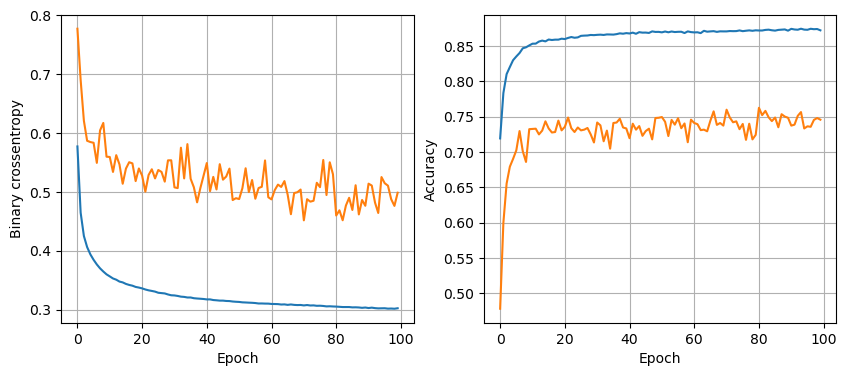

119/119 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.01, batch size 32


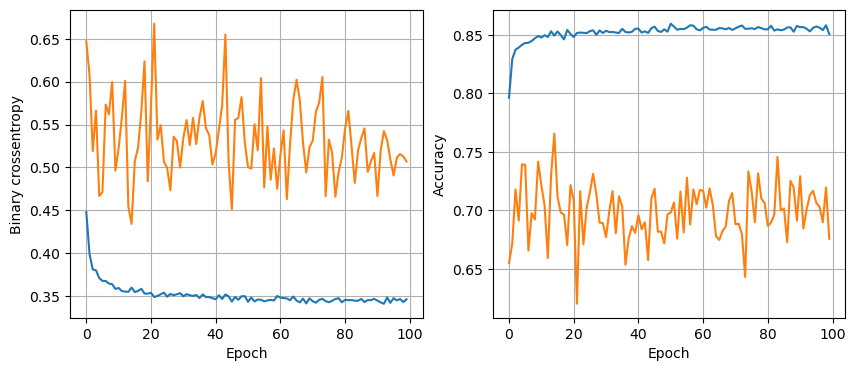

119/119 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.01, batch size 64


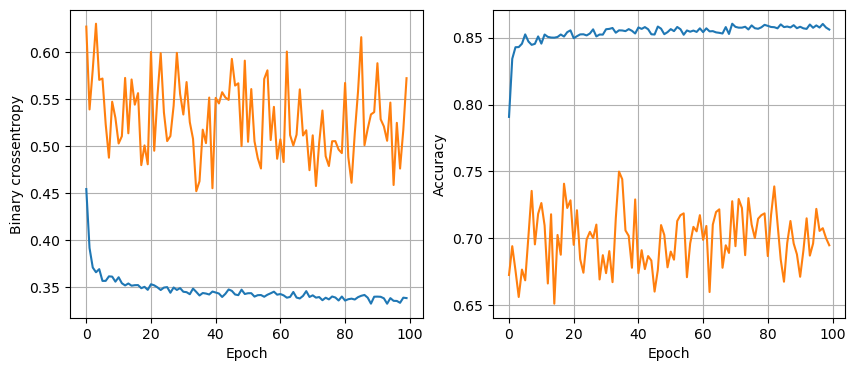

119/119 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8633
16 nodes, dropout 0.2, lr 0.01, batch size 128


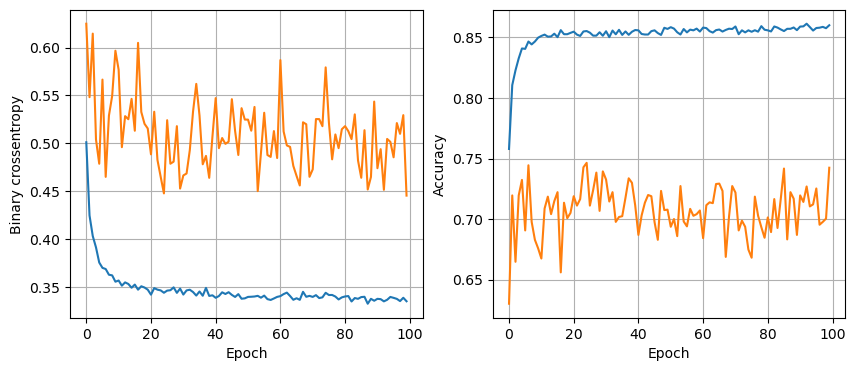

119/119 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.005, batch size 32


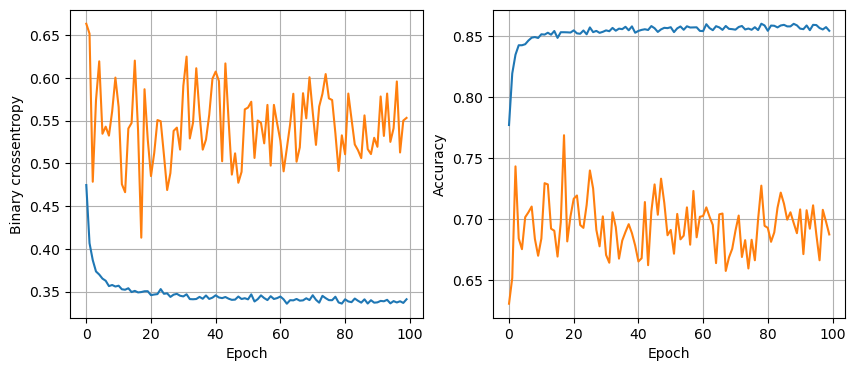

119/119 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.005, batch size 64


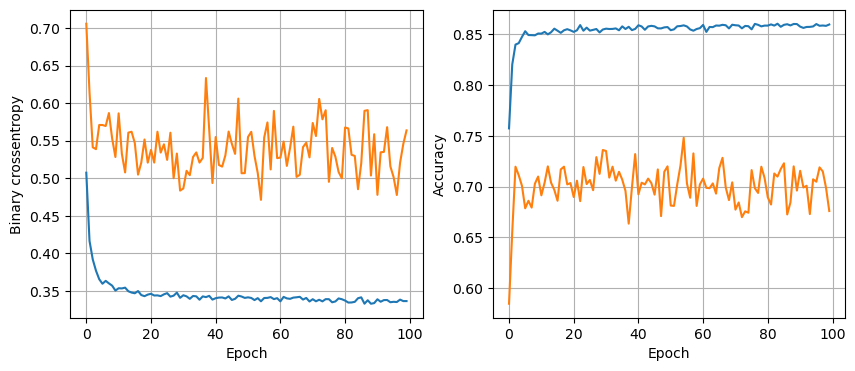

119/119 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.005, batch size 128


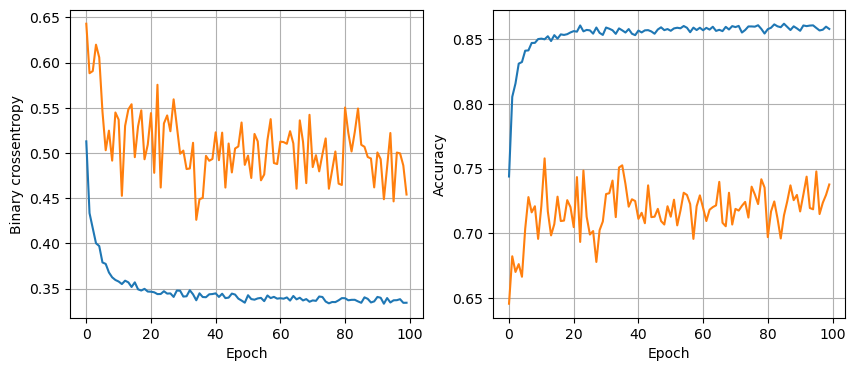

119/119 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.001, batch size 32


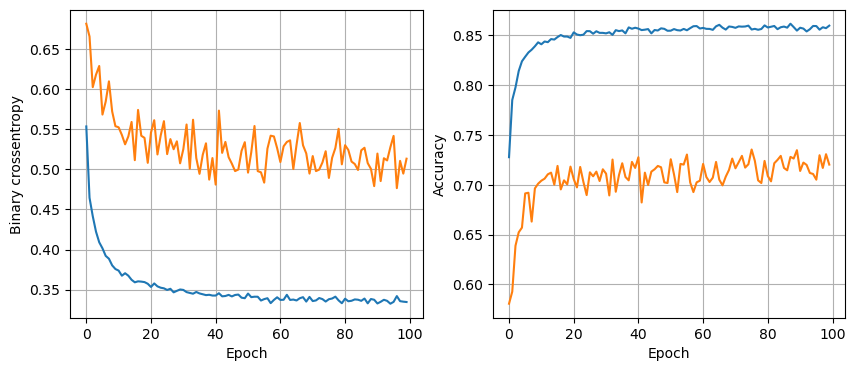

119/119 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.001, batch size 64


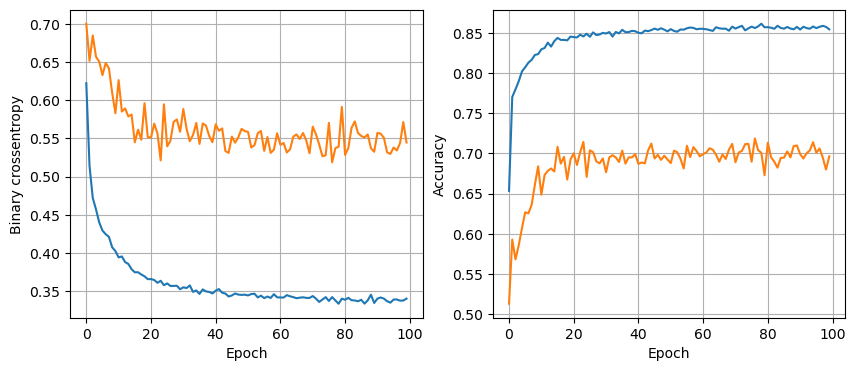

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8646
16 nodes, dropout 0.2, lr 0.001, batch size 128


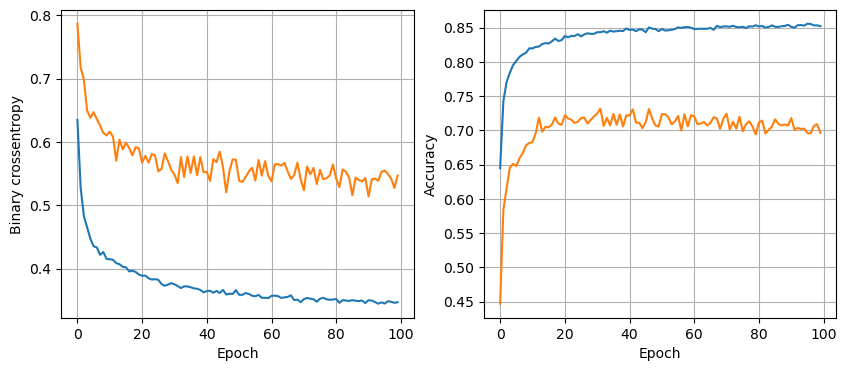

119/119 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.01, batch size 32


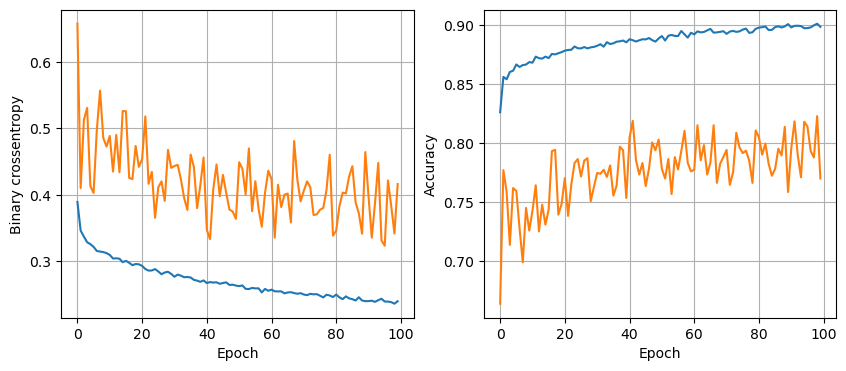

119/119 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8730
32 nodes, dropout 0, lr 0.01, batch size 64


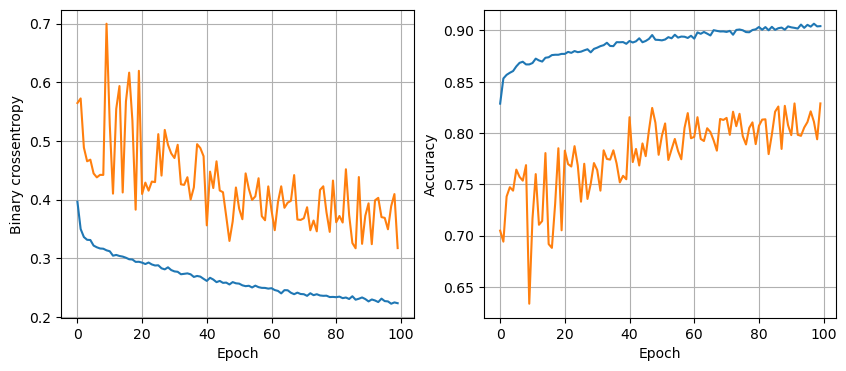

119/119 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8557
32 nodes, dropout 0, lr 0.01, batch size 128


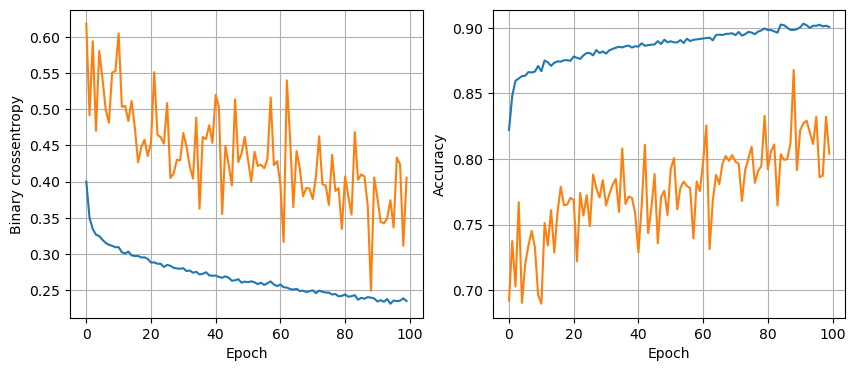

119/119 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8612
32 nodes, dropout 0, lr 0.005, batch size 32


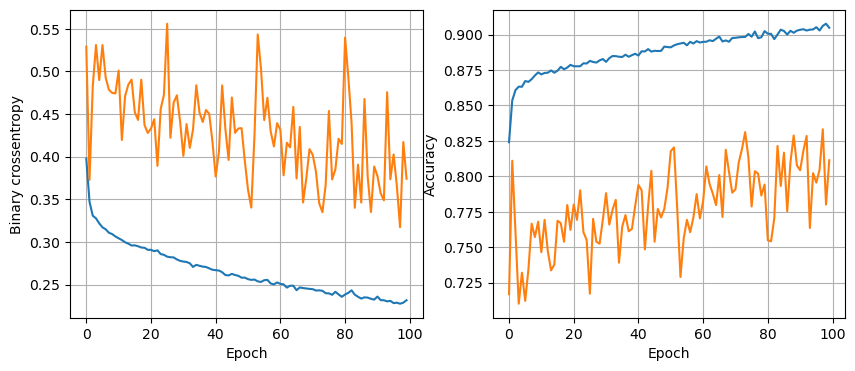

119/119 [==============================] - 0s 957us/step - loss: 0.3487 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.005, batch size 64


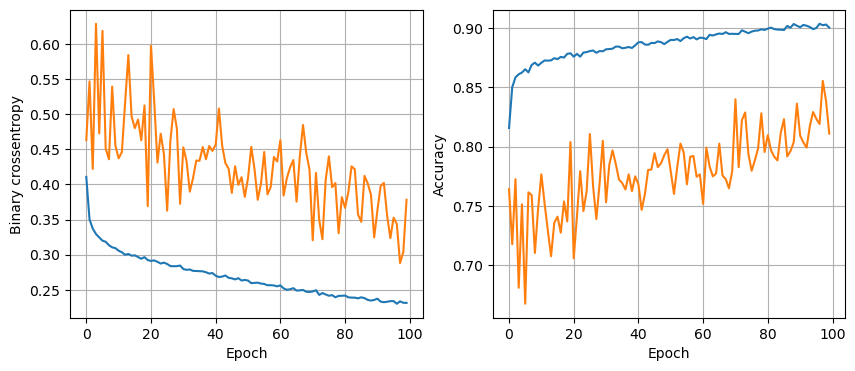

119/119 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8646
32 nodes, dropout 0, lr 0.005, batch size 128


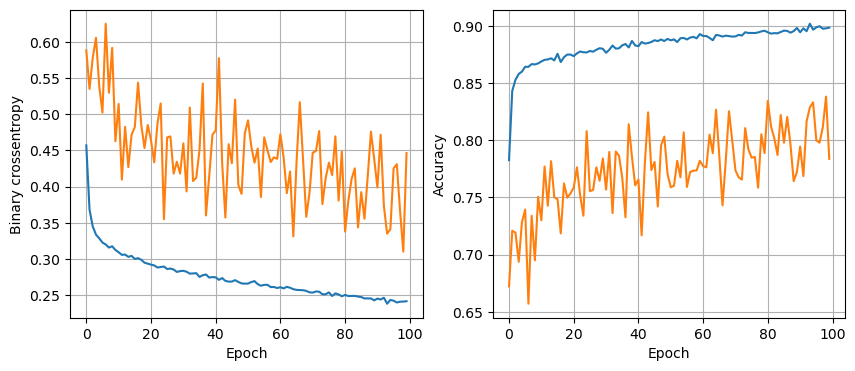

119/119 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.001, batch size 32


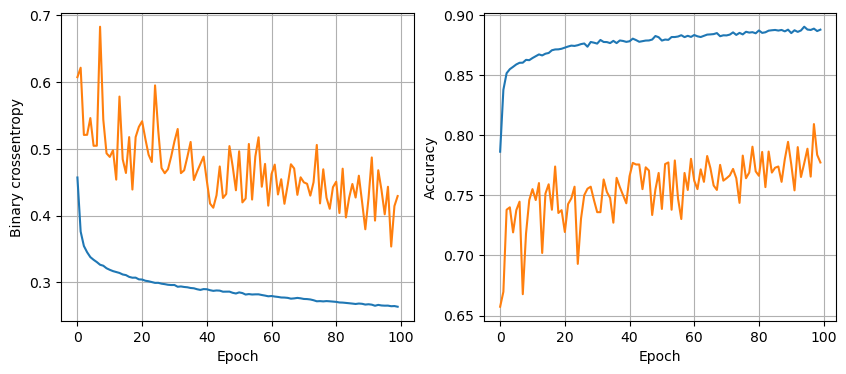

119/119 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8728
32 nodes, dropout 0, lr 0.001, batch size 64


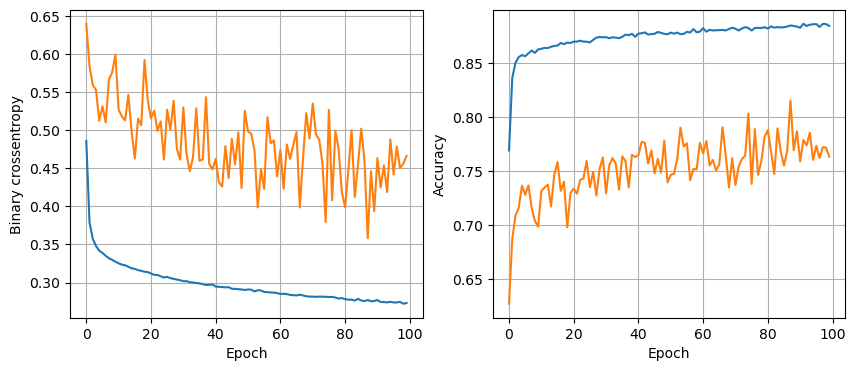

119/119 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8712
32 nodes, dropout 0, lr 0.001, batch size 128


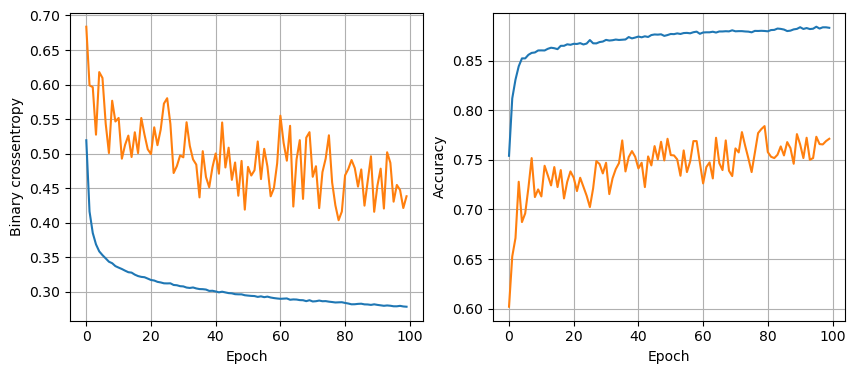

119/119 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.01, batch size 32


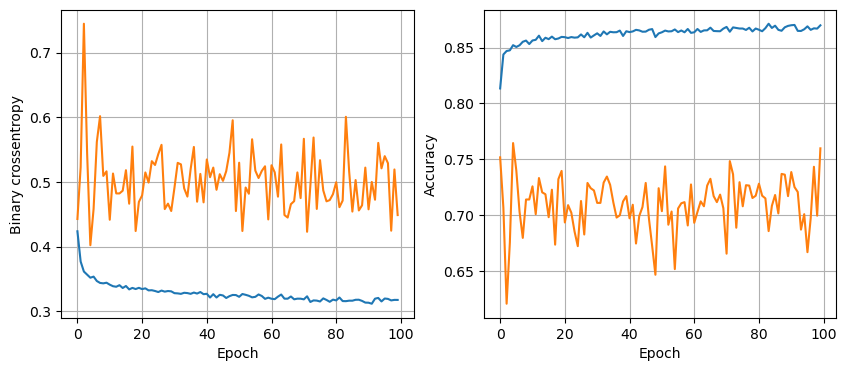

119/119 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.01, batch size 64


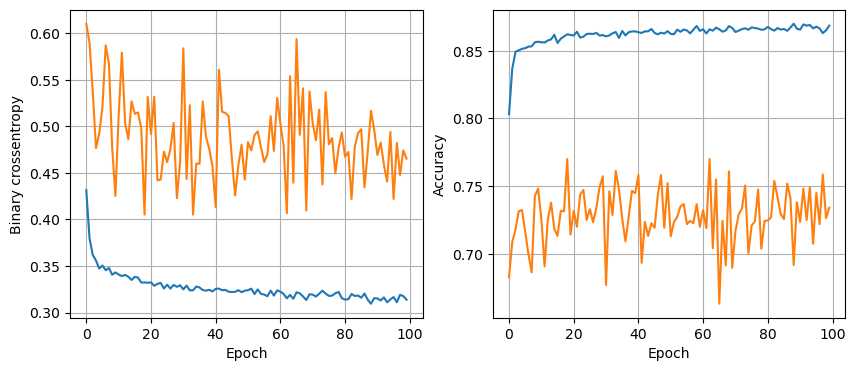

119/119 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8720
32 nodes, dropout 0.2, lr 0.01, batch size 128


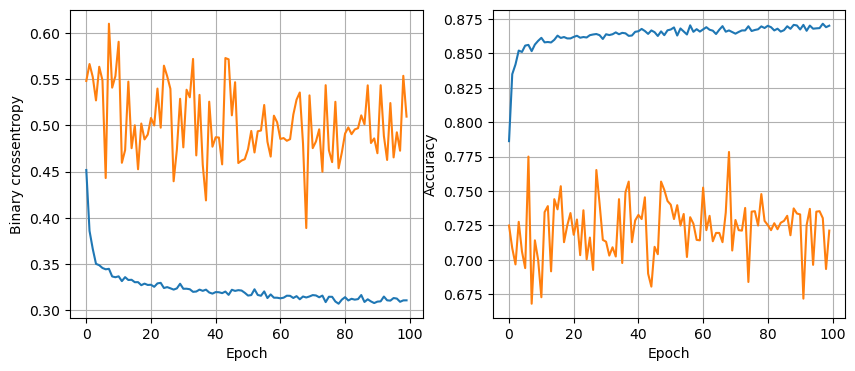

119/119 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.005, batch size 32


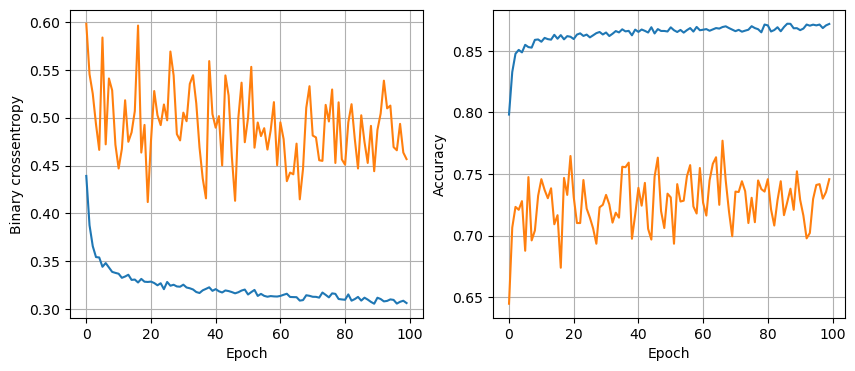

119/119 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.005, batch size 64


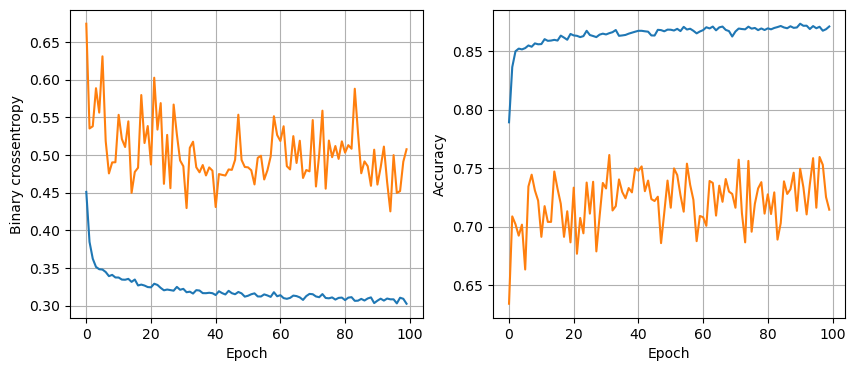

119/119 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.005, batch size 128


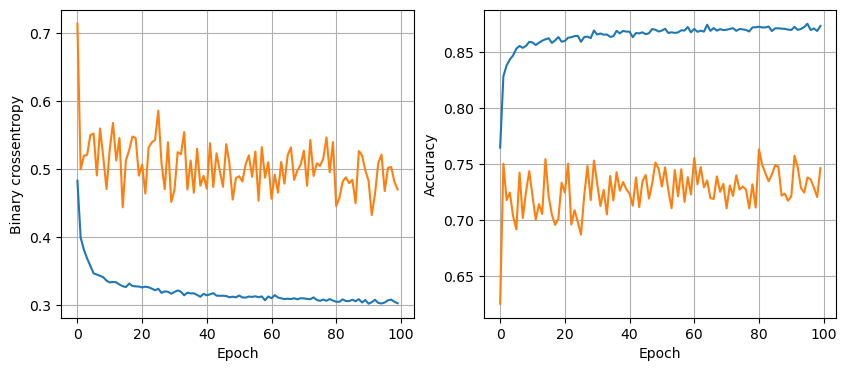

119/119 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.8812
32 nodes, dropout 0.2, lr 0.001, batch size 32


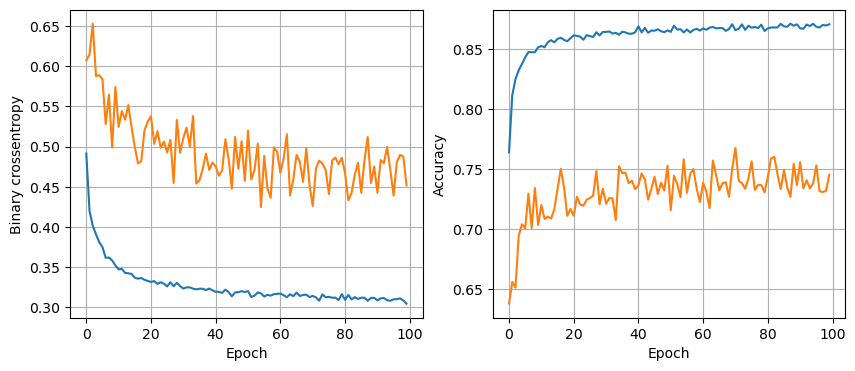

119/119 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.001, batch size 64


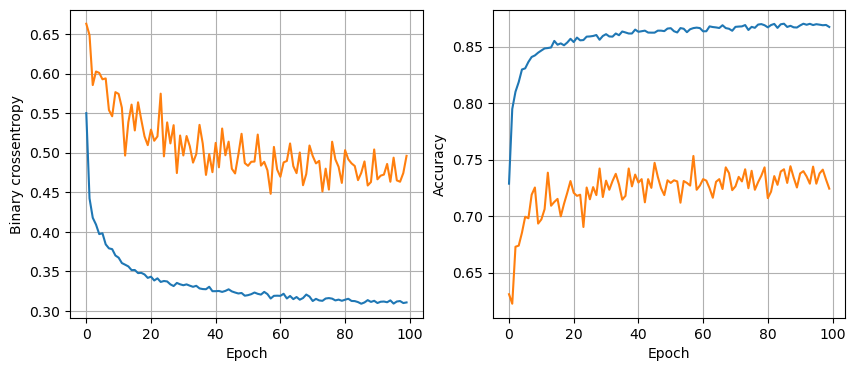

119/119 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8746
32 nodes, dropout 0.2, lr 0.001, batch size 128


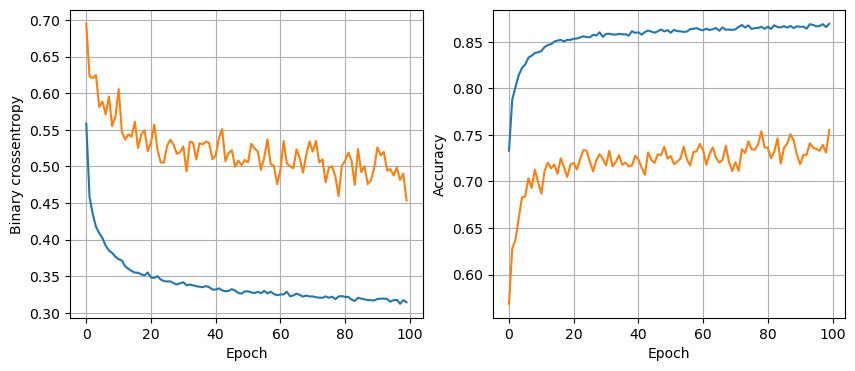

119/119 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8712
65 nodes, dropout 0, lr 0.01, batch size 32


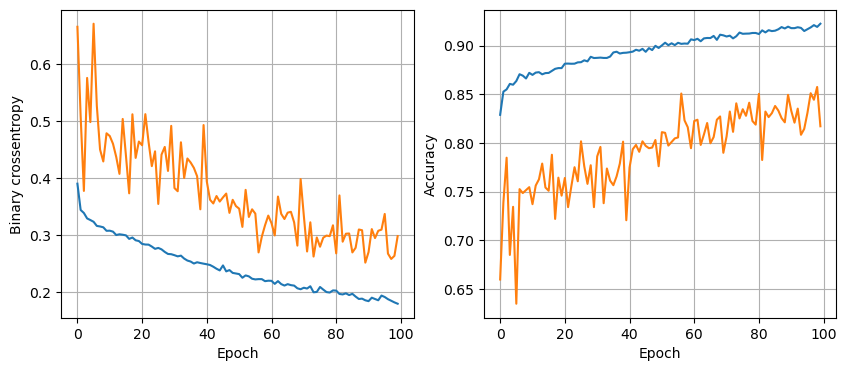

119/119 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.8623
65 nodes, dropout 0, lr 0.01, batch size 64


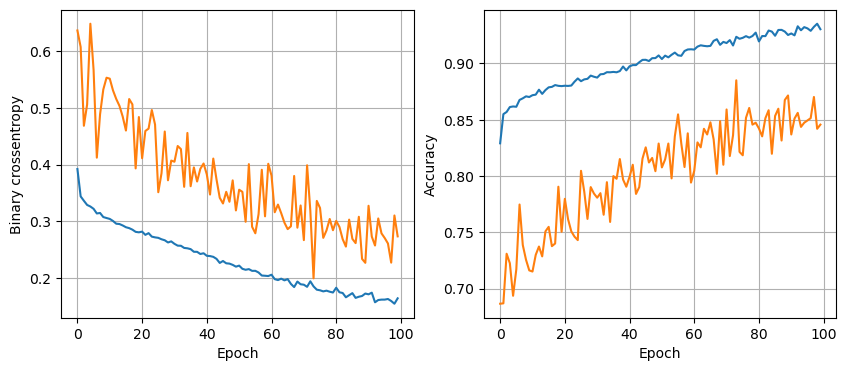

119/119 [==============================] - 0s 948us/step - loss: 0.5117 - accuracy: 0.8628
65 nodes, dropout 0, lr 0.01, batch size 128


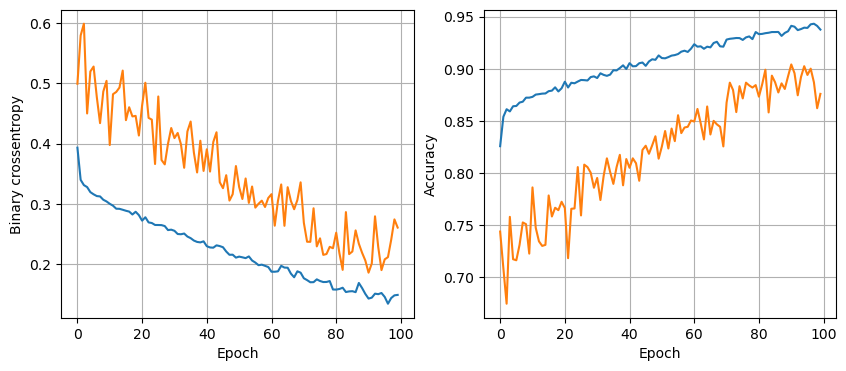

119/119 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.8580
65 nodes, dropout 0, lr 0.005, batch size 32


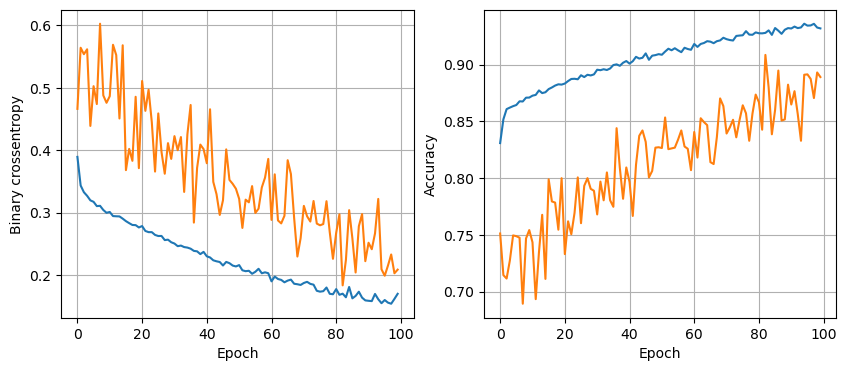

119/119 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.8586
65 nodes, dropout 0, lr 0.005, batch size 64


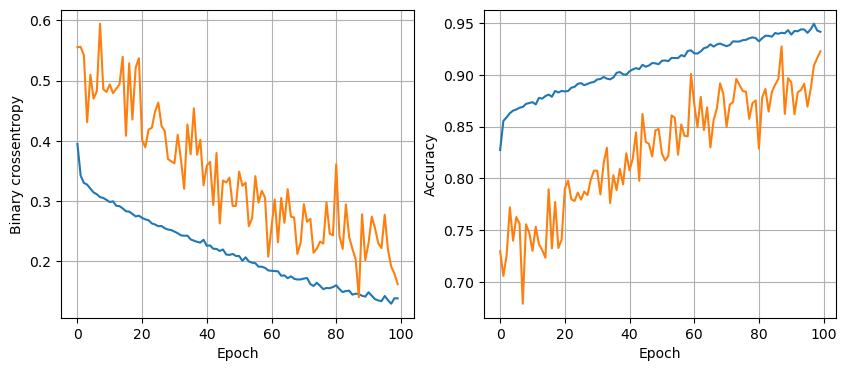

119/119 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.8620
65 nodes, dropout 0, lr 0.005, batch size 128


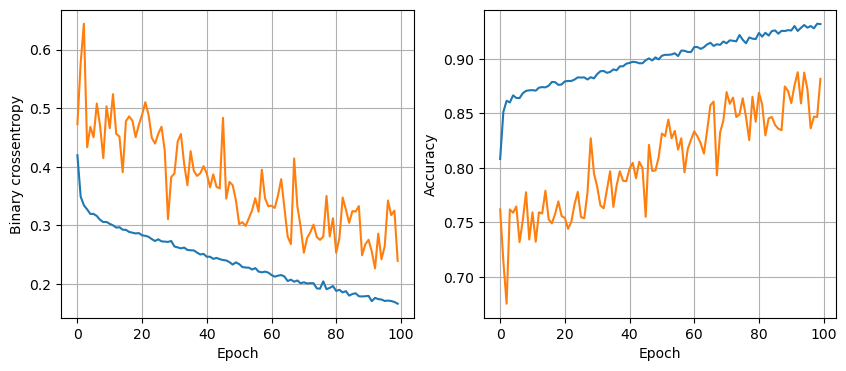

119/119 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8667
65 nodes, dropout 0, lr 0.001, batch size 32


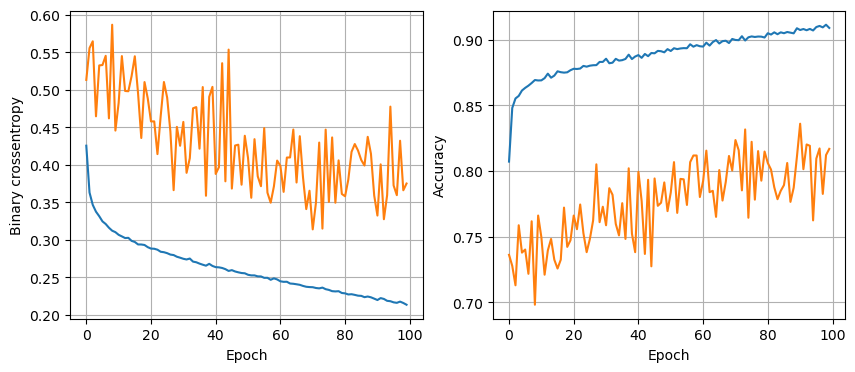

119/119 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8704
65 nodes, dropout 0, lr 0.001, batch size 64


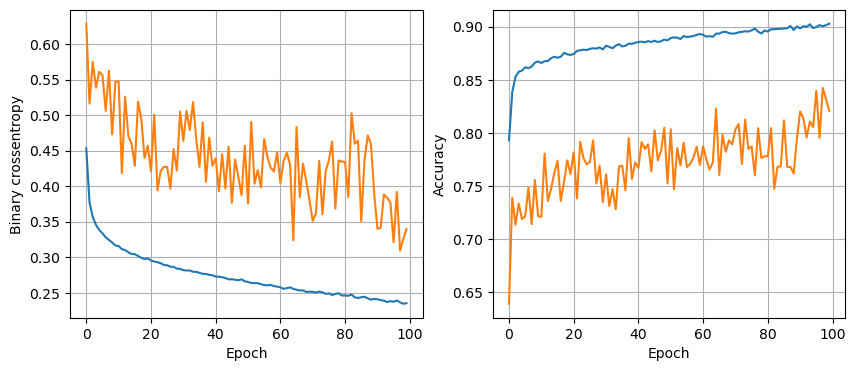

119/119 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8691
65 nodes, dropout 0, lr 0.001, batch size 128


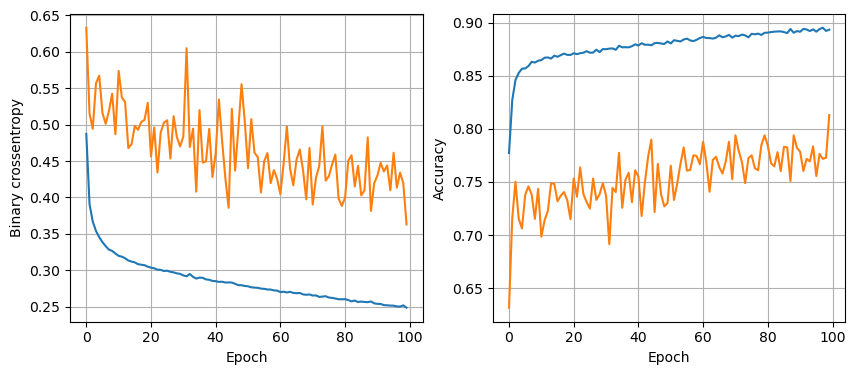

119/119 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8754
65 nodes, dropout 0.2, lr 0.01, batch size 32


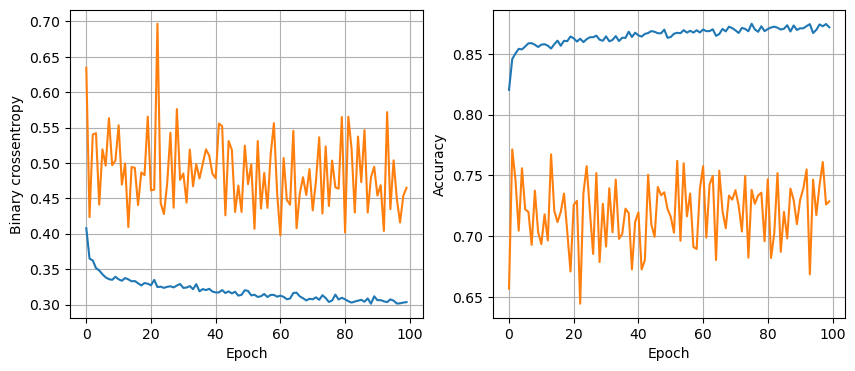

119/119 [==============================] - 0s 1ms/step - loss: 0.3015 - accuracy: 0.8720
65 nodes, dropout 0.2, lr 0.01, batch size 64


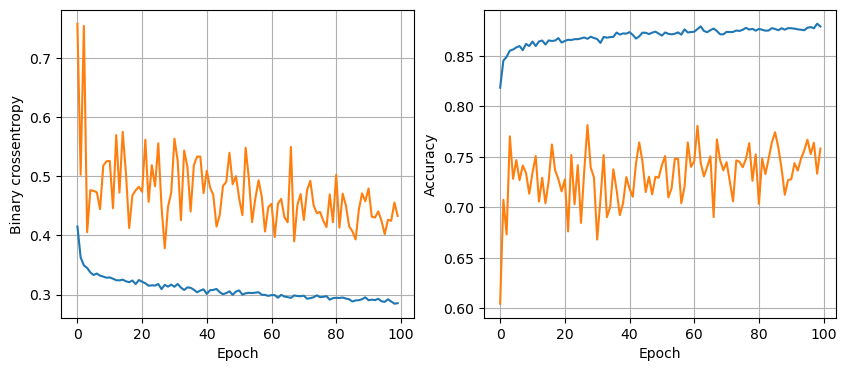

119/119 [==============================] - 0s 1ms/step - loss: 0.3033 - accuracy: 0.8801
65 nodes, dropout 0.2, lr 0.01, batch size 128


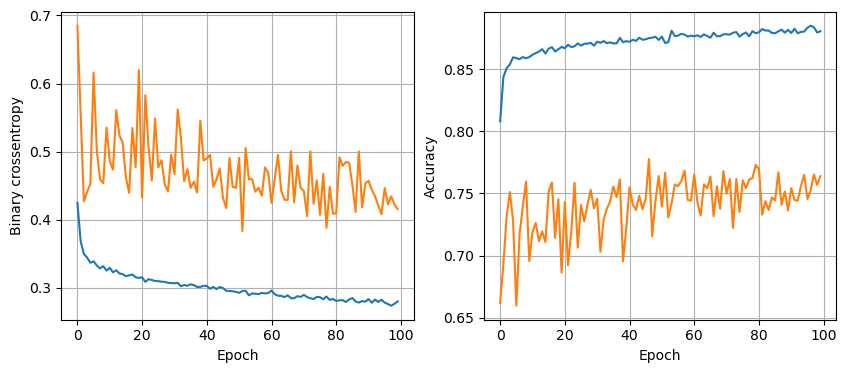

119/119 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8788
65 nodes, dropout 0.2, lr 0.005, batch size 32


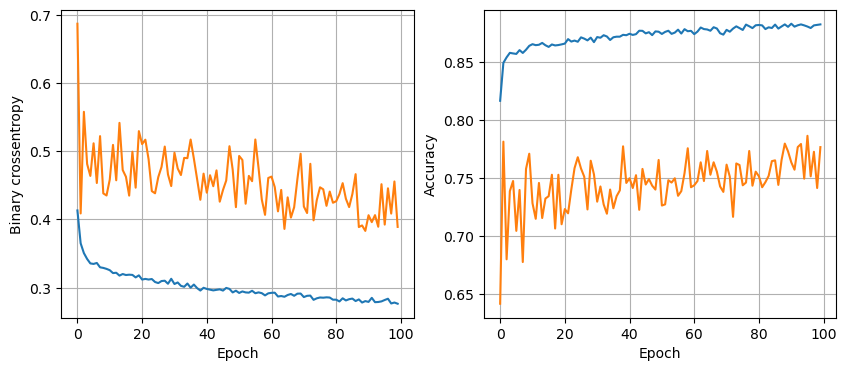

119/119 [==============================] - 0s 973us/step - loss: 0.3029 - accuracy: 0.8843
65 nodes, dropout 0.2, lr 0.005, batch size 64


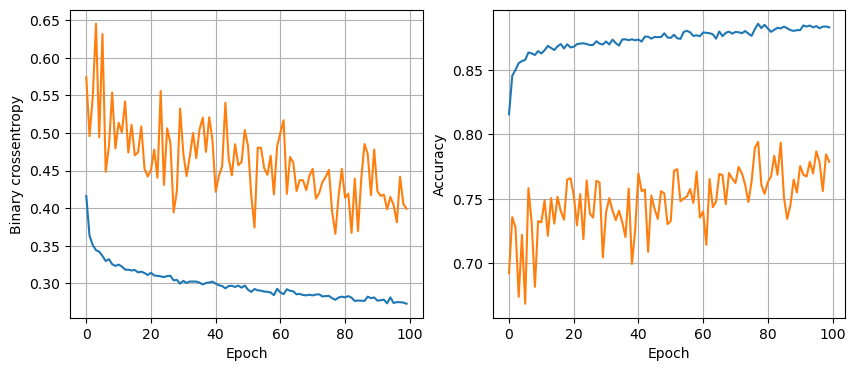

119/119 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8820
65 nodes, dropout 0.2, lr 0.005, batch size 128


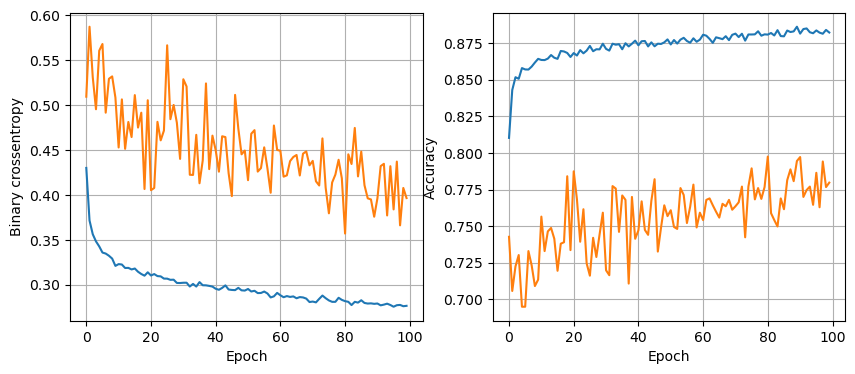

119/119 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.8741
65 nodes, dropout 0.2, lr 0.001, batch size 32


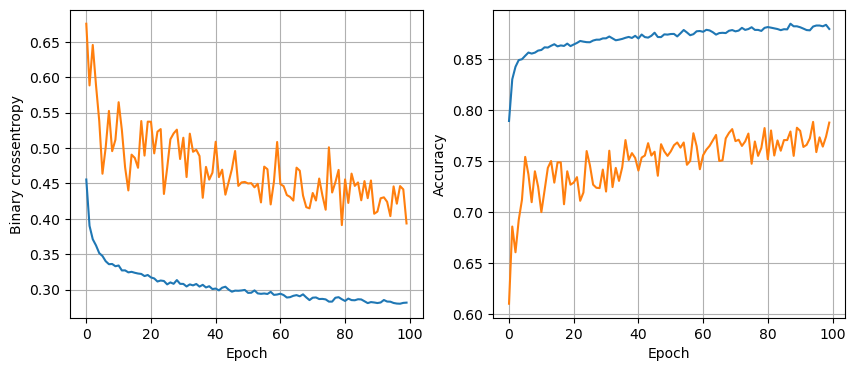

119/119 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.8828
65 nodes, dropout 0.2, lr 0.001, batch size 64


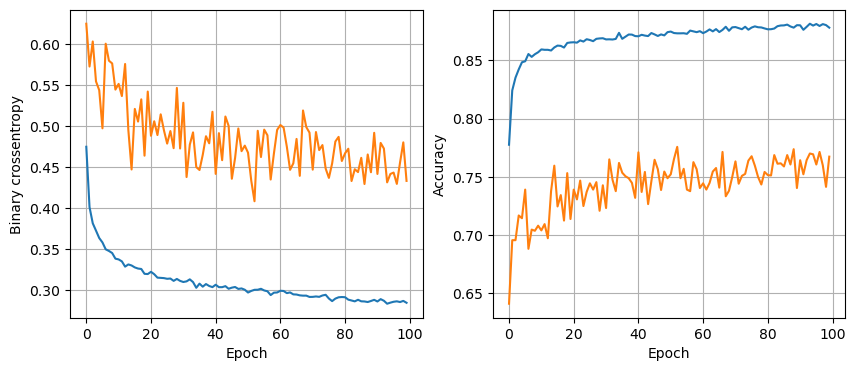

119/119 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.8812
65 nodes, dropout 0.2, lr 0.001, batch size 128


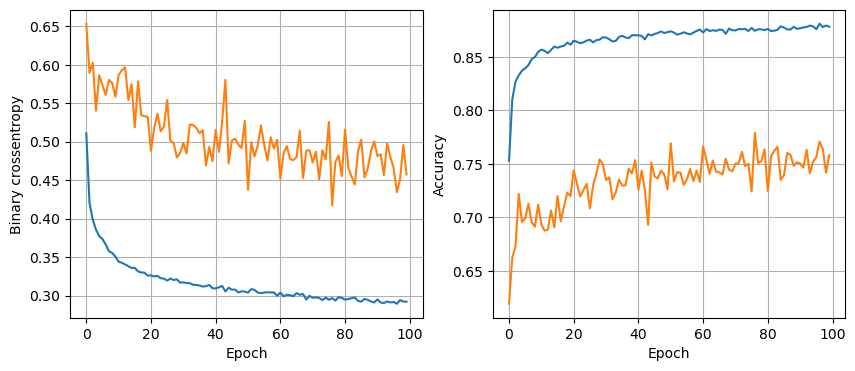

119/119 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8783


In [60]:
least_val_loss = float('inf')
leasr_loss_model = None
epochs =100
for num_nodes in[16,32,65]:
    for dropout_prob in[0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model , history = train_model(X_train,y_train, num_nodes, dropout_prob,lr, batch_size,epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid,y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    leasr_loss_model = model

In [63]:
y_pred = leasr_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 865us/step


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1338
           1       0.88      0.95      0.91      2466

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

